# **Exp 1**: Different Cashier, Same Customer

In [47]:
import pygame
import sys
import random
import time
import matplotlib.pyplot as plt

# Initialize pygame
pygame.init()

# Screen attributes
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Box size
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Cashier positions
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]

customers = []

# Total serving time for each cashiers
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Function to add a customer
def add_customer(cols):
    # Queue amount
    rows = 5
    # Place the customer on the cashier queue randomly
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Function to draw a box
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

# Function to draw the customer
def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

# Function to draw the cashier
def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Main function
def main():
    clock = pygame.time.Clock()
    serving_time = 20 
    add_customer_time = 10 
    day_count = 1

    while day_count <= 30:
        # Items bought by customer (random)
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Amount of cashier based on the day type
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Saturday (6) dan Sunday (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
        else:  # Monday (1) to Friday (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulate 8 hours per day
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Initiliaze served customer

            # Amount of customers per hour
            max_customers = random.randint(30, 50)
            
            # Handle events
            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Time now
                current_time = pygame.time.get_ticks()

                # Add customer randomly
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


Average Serving Time per Day (seconds): {1: 1124.874205761093, 2: 1191.306244892972, 3: 1065.1501388294084, 4: 1144.8988829175555, 5: 1270.5093161977245, 6: 660.0257470183831, 7: 615.0498193556128, 8: 996.1578069487042, 9: 1030.775340950077, 10: 1092.8388529315037}
Average Customers Served per Day: {1: 115.66666666666667, 2: 117.0, 3: 112.33333333333333, 4: 109.0, 5: 125.66666666666667, 6: 67.8, 7: 60.0, 8: 102.66666666666667, 9: 96.33333333333333, 10: 105.33333333333333}


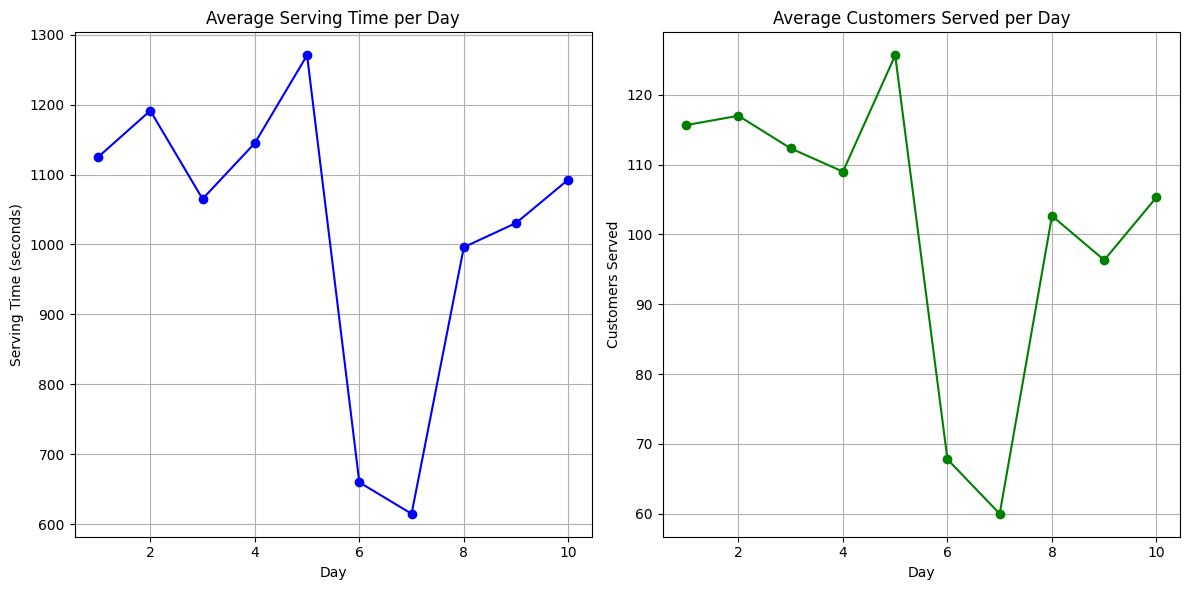

In [50]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# **Exp 2**: Same Cashier, Different Customer

In [1]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
# weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
weekend_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 20  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (50, 80)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (30, 50)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(*max_customers_range)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.2, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
Average Serving Time per Day (seconds): {1: 980.6118188444939, 2: 1014.2716045237397, 3: 1029.9124275026345, 4: 919.3920846451722, 5: 1030.1516691577744, 6: 1867.8688648194652, 7: 1758.660821385142, 8: 1122.9231190256287, 9: 1091.5665458431238, 10: 1200.0739185764369}
Average Customers Served per Day: {1: 100.0, 2: 104.66666666666667, 3: 108.33333333333333, 4: 100.33333333333333, 5: 109.0, 6: 180.33333333333334, 7: 171.66666666666666, 8: 107.33333333333333, 9: 102.0, 10: 113.0}


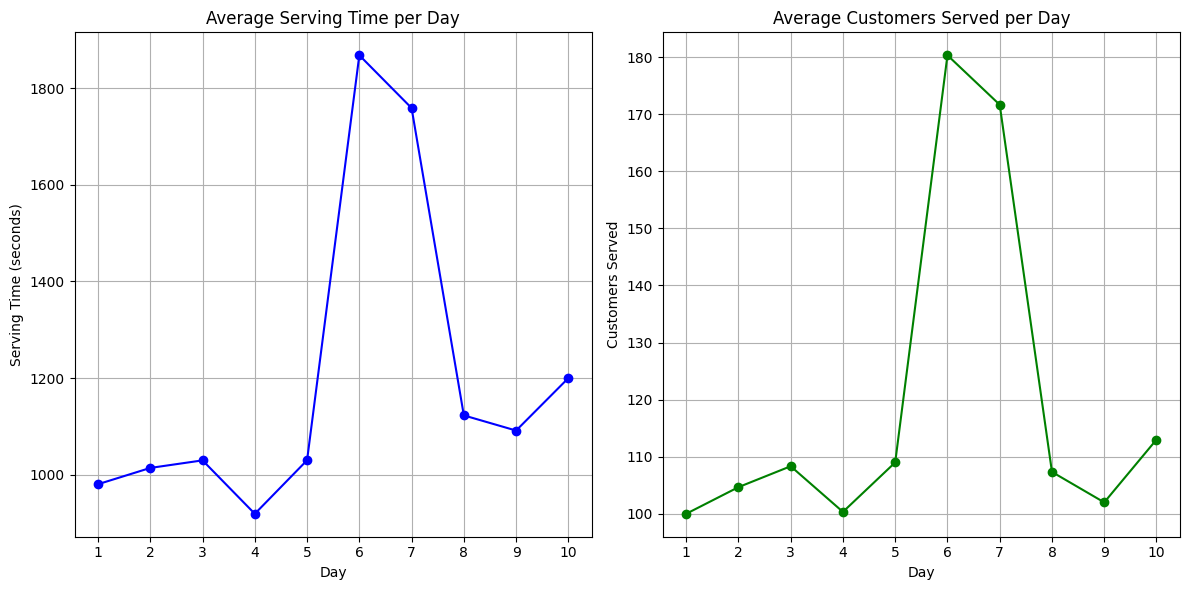

: 

In [4]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

# **Exp 3**: Different Cashier, Different Customer

In [1]:
import pygame
import sys
import random
import time

# Inisialisasi Pygame
pygame.init()

# Ukuran layar
screen_width = 800
screen_height = 800
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption('Simulasi Antrian Kasir')

# Warna
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)

# Ukuran kotak
box_size = 100
margin = 10

# Cashier logo
cashier_logo = pygame.image.load('./resource/cashier_logo.png')
cashier_logo_resized = pygame.transform.scale(cashier_logo, (50, 50))

# Cart logo
cart_logo = pygame.image.load('./resource/cart_logo.png')
cart_logo_resized = pygame.transform.scale(cart_logo, (50, 50))

# Koordinat kasir dalam grid
weekend_cashiers = [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
weekday_cashiers = [(1, 0), (3, 0), (5, 0)]
customers = []

# Waktu total pelayanan untuk masing-masing kasir
total_serving_time = [0] * 5

# Dictionary for storing average serving time and customers served per day
average_serving_time_per_day = {}
average_customers_served_per_day = {}

# Fungsi untuk menambah pelanggan baru secara acak
def add_customer(cols):
    # Jumlah baris di grid
    rows = 5
    # Pilih koordinat acak untuk pelanggan baru
    new_customer = (random.choice(cols), rows)
    customers.append(new_customer)

# Fungsi untuk menggambar kotak
def draw_box(screen, color, x, y):
    pygame.draw.rect(screen, color, (x, y, box_size, box_size))

def draw_customer(screen, x, y):
    screen.blit(cart_logo_resized, (x, y))

def draw_cashier(screen, x, y):
    screen.blit(cashier_logo_resized, (x, y))

# Fungsi utama
def main():
    clock = pygame.time.Clock()
    serving_time = 20  # 50 milidetik per langkah
    add_customer_time = 10  # Tambah pelanggan setiap 1 detik
    day_count = 1

    while day_count <= 30:
        # Tentukan pola pembelian berdasarkan hari
        if day_count <= 15:
            item_distribution = [0.3, 0.7]  # 1-5 items: 30%, 5-10 items: 70%
        else:
            item_distribution = [0.2, 0.8]  # 1-5 items: 20%, 5-10 items: 80%

        # Tentukan jumlah kasir berdasarkan hari dalam seminggu
        day_of_week = (day_count - 1) % 7 + 1
        if day_of_week in [6, 7]:  # Sabtu (6) dan Minggu (7)
            cashiers = weekend_cashiers
            num_cashiers = 5
            cashier_indices = range(5)
            max_customers_range = (50, 80)
        else:  # Senin (1) sampai Jumat (5)
            cashiers = weekday_cashiers
            num_cashiers = 3
            cashier_indices = range(3)
            max_customers_range = (30, 50)

        total_serving_time_day = 0
        total_customers_served_day = 0

        for hour in range(1, 9):  # Simulasi 8 jam per hari
            last_move_time = pygame.time.get_ticks()
            last_add_time = pygame.time.get_ticks()
            served_customers = 0  # Inisialisasi jumlah pelanggan yang sudah dilayani

            max_customers = random.randint(*max_customers_range)

            while served_customers < max_customers:
                for event in pygame.event.get():
                    if event.type == pygame.QUIT:
                        pygame.quit()
                        sys.exit()

                # Hitung waktu sekarang
                current_time = pygame.time.get_ticks()

                # Tambah pelanggan baru secara acak
                if current_time - last_add_time >= add_customer_time:
                    add_customer([cashier[0] for cashier in cashiers])
                    last_add_time = current_time

                # Jika waktu pelayanan telah berlalu, pindahkan antrian
                if current_time - last_move_time >= serving_time:
                    last_move_time = current_time

                    if customers:
                        # Periksa apakah pelanggan di depan berada di salah satu koordinat yang diizinkan untuk dilayani
                        front_customer = customers[0]
                        cashier_positions = [(cashier[0], 1) for cashier in cashiers]
                        if front_customer in cashier_positions:
                            cashier_index = cashier_positions.index(front_customer)
                            
                            # Jumlah barang
                            groceries_ratio = random.random()
                            if groceries_ratio < item_distribution[0]:
                                groceries_amount = random.randint(1, 5)
                            else:
                                groceries_amount = random.randint(5, 10)

                            # Waktu pelayanan per item random antara 200 sampai 500 milidetik
                            for _ in range(groceries_amount):
                                time_per_item = random.uniform(200, 500)
                                total_serving_time[cashier_index] += time_per_item

                            customers.pop(0)  # Hapus pelanggan yang dilayani
                            served_customers += 1  # Tambahkan jumlah pelanggan yang sudah dilayani

                        for i in range(len(customers)):
                            x, y = customers[i]
                            # Pindahkan pelanggan satu langkah ke depan dalam antrian
                            if y > 1:
                                customers[i] = (x, y - 1)

                screen.fill(WHITE)

                # Gambar kasir
                for cashier in cashiers:
                    x = cashier[0] * (box_size + margin)
                    y = cashier[1] * (box_size + margin)
                    draw_cashier(screen, x, y)

                # Gambar pelanggan
                for customer in customers:
                    x = customer[0] * (box_size + margin)
                    y = customer[1] * (box_size + margin)
                    draw_customer(screen, x, y)

                # Tampilkan total waktu pelayanan untuk masing-masing kasir di layar bagian bawah kanan
                font = pygame.font.Font(None, 36)
                for i in cashier_indices:
                    text = font.render(f'Cashier {i+1}: {int(total_serving_time[i] / 1000)} s', True, BLACK)
                    screen.blit(text, (screen_width - text.get_width() - 10, screen_height - (len(cashier_indices) - i) * 30))

                # Tampilkan jumlah pelanggan yang sudah dilayani di layar bagian bawah kiri
                text_served_customers = font.render(f'Customer served: {served_customers}', True, BLACK)
                screen.blit(text_served_customers, (10, screen_height - text_served_customers.get_height() - 10))

                # Tampilkan jam ke berapa di layar bagian atas
                text_hour = font.render(f'Hour: {hour}', True, BLACK)
                screen.blit(text_hour, (10, 10))

                # Tampilkan hari ke berapa di layar bagian atas
                text_day = font.render(f'Day: {day_count}', True, BLACK)
                screen.blit(text_day, (10, 50))

                pygame.display.flip()
                clock.tick(30)

            total_serving_time_day += sum(total_serving_time[:num_cashiers])
            total_customers_served_day += served_customers

        # Calculate and store the average serving time and average customers served for the day
        average_serving_time_per_day[day_count] = total_serving_time_day / num_cashiers / 1000  # Convert to seconds
        average_customers_served_per_day[day_count] = total_customers_served_day / num_cashiers

        # Reset pelanggan dan waktu setelah setiap hari
        customers.clear()
        for i in range(len(total_serving_time)):
            total_serving_time[i] = 0

        day_count += 1

    # Display averages at the end of the simulation
    print("Average Serving Time per Day (seconds):", average_serving_time_per_day)
    print("Average Customers Served per Day:", average_customers_served_per_day)

if __name__ == "__main__":
    main()


pygame 2.5.2 (SDL 2.28.2, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html
Average Serving Time per Day (seconds): {1: 1060.3151869474536, 2: 1064.0951775266192, 3: 1078.920935174628, 4: 996.4339010361865, 5: 1044.9481975850554, 6: 1099.4895123106246, 7: 1042.4340205146264, 8: 1209.0601514408943, 9: 1185.9355630095165, 10: 1101.0210399395687}
Average Customers Served per Day: {1: 105.0, 2: 104.66666666666667, 3: 111.33333333333333, 4: 105.33333333333333, 5: 106.33333333333333, 6: 99.6, 7: 98.0, 8: 111.66666666666667, 9: 118.66666666666667, 10: 104.0}


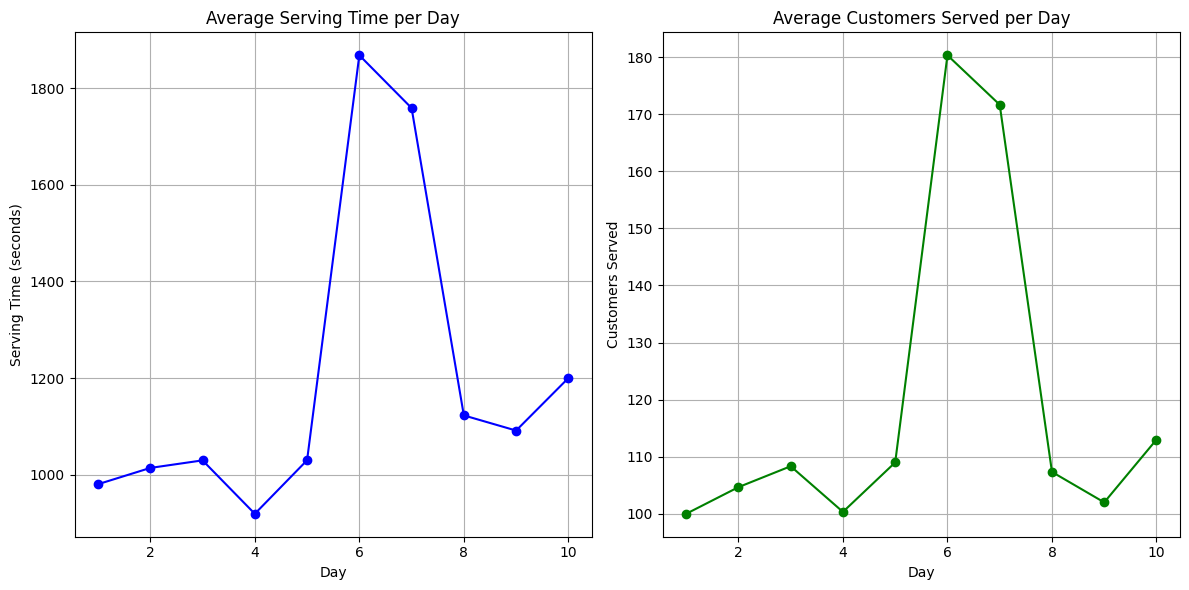

In [3]:
import matplotlib.pyplot as plt

# Extract days
days = list(average_serving_time_per_day.keys())

# Extract serving times and customer counts
serving_times = list(average_serving_time_per_day.values())
customer_counts = list(average_customers_served_per_day.values())

# Plot average serving time per day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(days, serving_times, marker='o', color='b')
plt.title('Average Serving Time per Day')
plt.xlabel('Day')
plt.ylabel('Serving Time (seconds)')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Plot average customers served per day
plt.subplot(1, 2, 2)
plt.plot(days, customer_counts, marker='o', color='g')
plt.title('Average Customers Served per Day')
plt.xlabel('Day')
plt.ylabel('Customers Served')
plt.xticks(days)  # Set x-axis ticks to show every day
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()